# Preliminary

### Import necessary scripts

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import os
import pandas as pd

import matplotlib.ticker
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import * 
#import mplhep as hep

### Define font for captions etc.

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
            })
plt.rc('lines',lw=2)

### Color formats for each experiments ("lcFASER" to be used for FPF facilities)

In [4]:
lcBelle2 = 'darkturquoise'
lcSuperCDMS = 'purple'
lcOscura = 'firebrick'
lcDarkSPHERE = 'seagreen'
lcFASER = 'magenta'
lcFLArE = 'limegreen'
lcLHCb = 'forestgreen'
lcNA64 = 'goldenrod'
lcSHiP = 'royalblue'
lcDarkSide = 'orangered'

### Elastic DM

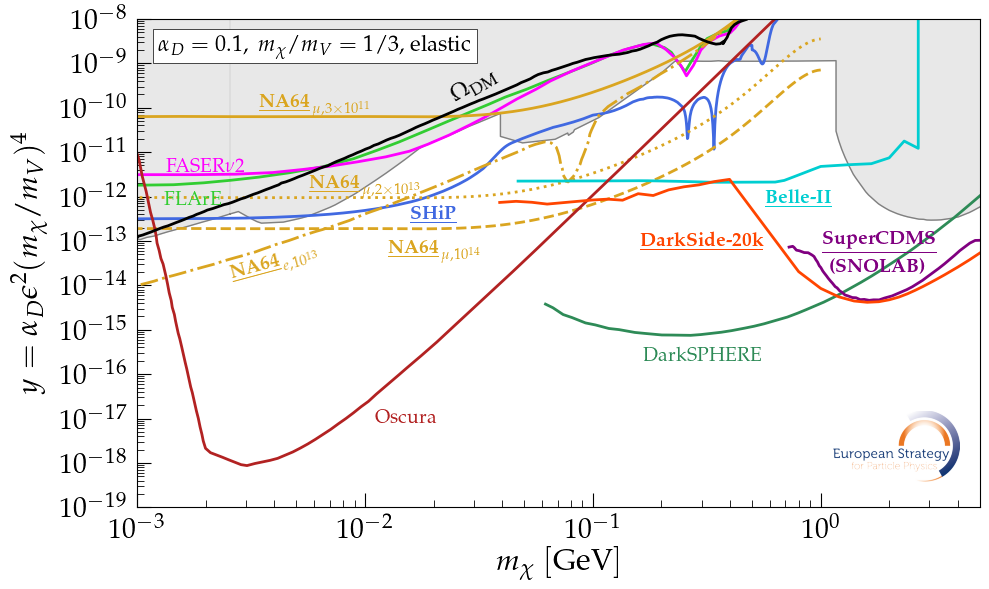

In [19]:
##### Input data files #####
## Sensitivity ##
df_FLARE = pd.read_csv("data/Sensitivities_BC2_FLARE.csv", skiprows = 1, header=None, names=['mass', 'coupling'])
df_FASERnu2 = pd.read_csv("data/Sensitivities_BC2_FASERnu2.csv")
df_SHiP = pd.read_csv("data/Sensitivities_BC2_SHiP.csv")
df_NA64e1e13 = pd.read_csv("data/Sensitivities_BC2_NA64e-1e13.csv")
df_NA64mu3e11 = pd.read_csv("data/Sensitivities_BC2_NA64mu3e11.csv")
df_NA64mu2e13 = pd.read_csv("data/Sensitivities_BC2_NA64mu2e13.csv")
df_NA64mu1e14 = pd.read_csv("data/Sensitivities_BC2_NA64mu1e14.csv")
df_Belle2 = pd.read_csv("data/Sensitivities_BC2_Belle II.csv")

## DD ##
df_Oscura = pd.read_csv("data/Sensitivities_BC2_Oscura.csv")
df_DarkSPHERE = pd.read_csv("data/Sensitivities_BC2_DarkSPHERE.csv")
df_SuperCDMS = pd.read_csv("data/Sensitivities_BC2_SuperCDMS_SNOLAB.csv")
df_DarkSide20k = pd.read_csv("data/Sensitivities_BC2_darkside20k-O1subGeVMigdal-18t-yr.csv")

## Constraints ##
df_Const = pd.read_csv("Merged constraints/Constraints_BC2-elastic_Merged.csv")

## Relic target ##
df_RelicScalar = pd.read_csv("data/relic-target-scalar.csv")
########################

##### Plot data files #####
fig = plt.figure()
fig.set_size_inches(10,6, forward=True)
ax = fig.add_subplot(1,1,1)
ax.tick_params(which='both',direction='in')
ax.tick_params(which='major',length=10)
ax.tick_params(which='minor',length=5)
ax.tick_params(labelsize=20, pad=7.5)
ax.set_xscale("log")
ax.set_yscale('log')
plt.xlim(1e-3,5)
plt.ylim(1e-19, 1e-8)
ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=999, subs=np.linspace(2,9,8)))
ax.set_yticks(np.logspace(-19,-8,12))
plt.xlabel(r'$m_\chi~[\mathrm{GeV}]$',fontsize=22,loc='center',labelpad=0)
plt.ylabel(r'$y = \alpha_D \epsilon^2 (m_\chi/m_V)^4$',fontsize=22,loc='center',labelpad=10)
plt.text(0.025,0.935,r'$\alpha_D = 0.1,~m_\chi/m_V = 1/3$, elastic',fontsize=16,
         bbox=dict(facecolor='white', edgecolor='black',lw=0.5),transform=ax.transAxes)
alphaD = 0.1
mchiA = 1./3.

## Constraint ##
plt.plot(df_Const['mass'],df_Const['coupling'], color='gray',lw=1)
plt.fill_between(df_Const['mass'],df_Const['coupling'], 1,color='lightgray',alpha=0.5)

## Sensitivity ##
plt.plot(df_FLARE['mass'],df_FLARE['coupling'],color=lcFLArE)
plt.plot(df_FASERnu2['mass'],df_FASERnu2['coupling'],color=lcFASER)
plt.plot(df_SHiP['mass'],df_SHiP['coupling'],color=lcSHiP)
plt.plot(df_NA64mu3e11['mass'],df_NA64mu3e11['coupling'],color=lcNA64)
plt.plot(df_NA64mu2e13['mass'],df_NA64mu2e13['coupling'],color=lcNA64,ls=':')
plt.plot(df_NA64mu1e14['mass'],df_NA64mu1e14['coupling'],color=lcNA64,ls='--')
plt.plot(df_NA64e1e13['mass'],df_NA64e1e13['coupling'],color=lcNA64,ls='-.')
plt.plot(df_Belle2['mass'],df_Belle2['coupling'],color=lcBelle2)

plt.plot(df_Oscura['mass'],df_Oscura['coupling'],color=lcOscura)
plt.plot(df_DarkSPHERE['mass'],df_DarkSPHERE['coupling'],color=lcDarkSPHERE)
plt.plot(df_SuperCDMS['mass'],df_SuperCDMS['coupling'],color=lcSuperCDMS)
plt.plot(df_DarkSide20k['mass'],df_DarkSide20k['coupling'],color=lcDarkSide)

## Relic target ##
plt.plot(df_RelicScalar['mass'],df_RelicScalar['coupling'],color='black')

## Text for legends ##
plt.text(1.75e-3,8.e-13,r'{FLArE}',fontsize=14,color=lcFLArE,ha='center',va='center')
plt.text(2e-3,4.5e-12,r'{FASER${\nu}$2}',fontsize=14,color=lcFASER,ha='center',va='center')
plt.text(2e-2,4.e-13,r'{\bf \underline{SHiP}}',fontsize=14,color=lcSHiP,ha='center',va='center')
plt.text(8e-1,9.e-13,r'{\bf \underline{Belle-II}}',fontsize=14,color=lcBelle2,ha='center',va='center')
plt.text(6e-3,1.2e-10,r'{\bf \underline{NA64}$_{\,\mu,3\times 10^{11}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(1e-2,1.75e-12,r'{\bf \underline{NA64}$_{\,\mu,2\times 10^{13}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(2e-2,6.e-14,r'{\bf \underline{NA64}$_{\,\mu,10^{14}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(4e-3,3.e-14,r'{\bf \underline{NA64}$_{\,e,10^{13}}$}',fontsize=14,rotation=15,color=lcNA64,ha='center',va='center')
plt.text(1.5e-2,1.e-17,r'{Oscura}',fontsize=14,color=lcOscura,ha='center',va='center')
plt.text(3.e-1,2.5e-16,r'{DarkSPHERE}',fontsize=14,color=lcDarkSPHERE,ha='center',va='center')
plt.text(1.8,1.e-13,r'{\bf \underline{SuperCDMS}}',fontsize=14,color=lcSuperCDMS,ha='center',va='center')
plt.text(1.8,2.5e-14,r'{\bf (SNOLAB)}',fontsize=14,color=lcSuperCDMS,ha='center',va='center')
plt.text(3.e-1,1e-13,r'{\bf \underline{DarkSide-20k}}',fontsize=14,color=lcDarkSide,ha='center',va='center')

plt.text(3e-2,3e-10,r'$\Omega_\mathrm{DM}$',fontsize=16,rotation=30,color='black',ha='center',va='center')

## ESPPU logo ##
img = mpimg.imread("ESPP-logo-2025-color@3x.png")
inset_ax = ax.inset_axes([0.825, 0.05, 0.15, 0.15])  # x0, y0, 15% width & height
inset_ax.imshow(img)
inset_ax.axis('off')
#plt.text(6.e-1,2.e-14,r'{\bf ESPP 2026: Preliminary}',fontsize=16,rotation=0,color='black',ha='center',va='center')

#plt.legend(fontsize=14, loc = 'lower right')
plt.tight_layout()
plt.savefig('Plots/ElasticDM.pdf',dpi=1000)

### Quasi-elastic DM
Corresponding to previous Fig.9.5 (top)

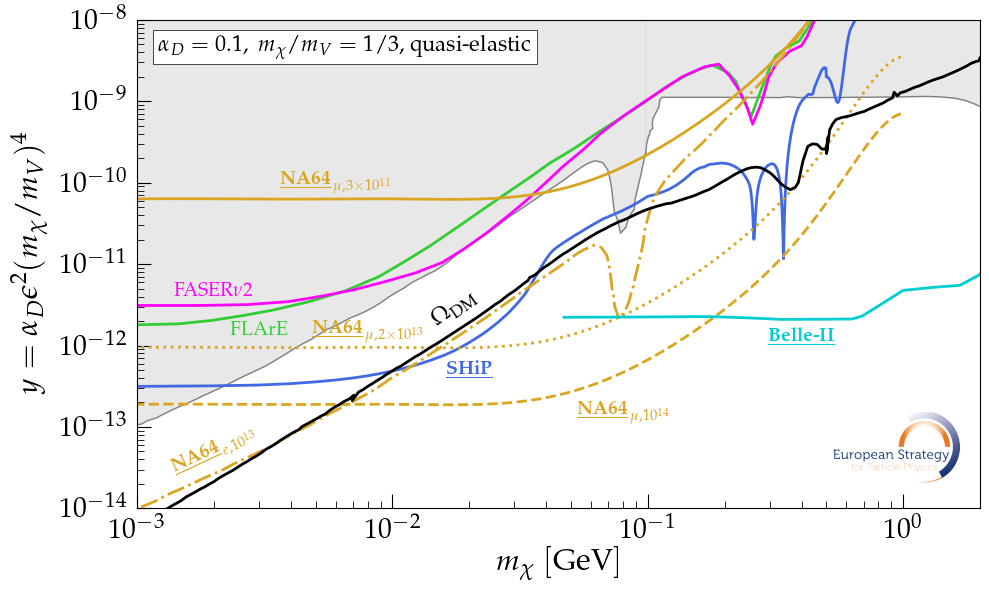

In [5]:
##### Input data files #####
## Sensitivity ##
df_FLARE = pd.read_csv("data/Sensitivities_BC2_FLARE.csv", skiprows = 1, header=None, names=['mass', 'coupling'])
df_FASERnu2 = pd.read_csv("data/Sensitivities_BC2_FASERnu2.csv")
df_SHiP = pd.read_csv("data/Sensitivities_BC2_SHiP.csv")
df_NA64e1e13 = pd.read_csv("data/Sensitivities_BC2_NA64e-1e13.csv")
df_NA64mu3e11 = pd.read_csv("data/Sensitivities_BC2_NA64mu3e11.csv")
df_NA64mu2e13 = pd.read_csv("data/Sensitivities_BC2_NA64mu2e13.csv")
df_NA64mu1e14 = pd.read_csv("data/Sensitivities_BC2_NA64mu1e14.csv")
df_Belle2 = pd.read_csv("data/Sensitivities_BC2_Belle II.csv")

## Quasi-elastic -> no DD constraints

## Constraints ##
df_Const = pd.read_csv("Merged constraints/Constraints_BC2-quasi-elastic_Merged.csv")

## Relic target ##
df_RelicPDirac = pd.read_csv("data/relic-target-pseudodirac.csv")
########################

##### Plot data files #####
fig = plt.figure()
fig.set_size_inches(10,6, forward=True)
ax = fig.add_subplot(1,1,1)
ax.tick_params(which='both',direction='in')
ax.tick_params(which='major',length=10)
ax.tick_params(which='minor',length=5)
ax.tick_params(labelsize=20, pad=7.5)
ax.set_xscale("log")
ax.set_yscale('log')
plt.xlim(1e-3,2)
plt.ylim(1e-14, 1e-8)
plt.xlabel(r'$m_\chi~[\mathrm{GeV}]$',fontsize=22,loc='center',labelpad=0)
plt.ylabel(r'$y = \alpha_D \epsilon^2 (m_\chi/m_V)^4$',fontsize=22,loc='center',labelpad=10)
plt.text(0.025,0.935,r'$\alpha_D = 0.1,~m_\chi/m_V = 1/3$, quasi-elastic',fontsize=16,
         bbox=dict(facecolor='white', edgecolor='black',lw=0.5),transform=ax.transAxes)
alphaD = 0.1
mchiA = 1./3.

## Constraint ##
plt.plot(df_Const['mass'],df_Const['coupling'], color='gray',lw=1)
plt.fill_between(df_Const['mass'],df_Const['coupling'], 1,color='lightgray',alpha=0.5)

## Sensitivity ##
plt.plot(df_FLARE['mass'],df_FLARE['coupling'],color=lcFLArE)
plt.plot(df_FASERnu2['mass'],df_FASERnu2['coupling'],color=lcFASER)
plt.plot(df_SHiP['mass'],df_SHiP['coupling'],color=lcSHiP)
plt.plot(df_NA64mu3e11['mass'],df_NA64mu3e11['coupling'],color=lcNA64)
plt.plot(df_NA64mu2e13['mass'],df_NA64mu2e13['coupling'],color=lcNA64,ls=':')
plt.plot(df_NA64mu1e14['mass'],df_NA64mu1e14['coupling'],color=lcNA64,ls='--')
plt.plot(df_NA64e1e13['mass'],df_NA64e1e13['coupling'],color=lcNA64,ls='-.')
plt.plot(df_Belle2['mass'],df_Belle2['coupling'],color=lcBelle2)

## Relic target ##
plt.plot(df_RelicPDirac['mass'],df_RelicPDirac['coupling'],color='black')

## Text for legends ##
plt.text(3.e-3,1.5e-12,r'{FLArE}',fontsize=14,color=lcFLArE,ha='center',va='center')
plt.text(2e-3,4.5e-12,r'{FASER${\nu}$2}',fontsize=14,color=lcFASER,ha='center',va='center')
plt.text(2e-2,5e-13,r'{\bf \underline{SHiP}}',fontsize=14,color=lcSHiP,ha='center',va='center')
plt.text(4e-1,1.25e-12,r'{\bf \underline{Belle-II}}',fontsize=14,color=lcBelle2,ha='center',va='center')
plt.text(6e-3,1.e-10,r'{\bf \underline{NA64}$_{\,\mu,3\times 10^{11}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(8e-3,1.5e-12,r'{\bf \underline{NA64}$_{\,\mu,2\times 10^{13}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(8e-2,1.5e-13,r'{\bf \underline{NA64}$_{\,\mu,10^{14}}$}',fontsize=14,color=lcNA64,ha='center',va='center')
plt.text(2e-3,5.e-14,r'{\bf \underline{NA64}$_{\,e,10^{13}}$}',fontsize=14,rotation=25,color=lcNA64,ha='center',va='center')

plt.text(1.75e-2,2.75e-12,r'$\Omega_\mathrm{DM}$',fontsize=16,rotation=35,color='black',ha='center',va='center')

## ESPPU logo ##
img = mpimg.imread("ESPP-logo-2025-color@3x.png")
inset_ax = ax.inset_axes([0.825, 0.05, 0.15, 0.15])  # x0, y0, 15% width & height
inset_ax.imshow(img)
inset_ax.axis('off')
#plt.text(6.e-1,2.e-14,r'{\bf ESPP 2026: Preliminary}',fontsize=16,rotation=0,color='black',ha='center',va='center')

#plt.legend(fontsize=14, loc = 'lower right')
plt.tight_layout()
plt.savefig('Plots/QuasiElasticDM.pdf',dpi=1000)